In [6]:
import tensorflow as tf

x = tf.linspace(-8., 8., 100)
y = tf.linspace(-8., 8., 100)

x,y = tf.meshgrid(x,y)

In [7]:
print(x, y)

tf.Tensor(
[[-8.        -7.8383837 -7.676768  ...  7.676768   7.8383837  8.       ]
 [-8.        -7.8383837 -7.676768  ...  7.676768   7.8383837  8.       ]
 [-8.        -7.8383837 -7.676768  ...  7.676768   7.8383837  8.       ]
 ...
 [-8.        -7.8383837 -7.676768  ...  7.676768   7.8383837  8.       ]
 [-8.        -7.8383837 -7.676768  ...  7.676768   7.8383837  8.       ]
 [-8.        -7.8383837 -7.676768  ...  7.676768   7.8383837  8.       ]], shape=(100, 100), dtype=float32) tf.Tensor(
[[-8.        -8.        -8.        ... -8.        -8.        -8.       ]
 [-7.8383837 -7.8383837 -7.8383837 ... -7.8383837 -7.8383837 -7.8383837]
 [-7.676768  -7.676768  -7.676768  ... -7.676768  -7.676768  -7.676768 ]
 ...
 [ 7.676768   7.676768   7.676768  ...  7.676768   7.676768   7.676768 ]
 [ 7.8383837  7.8383837  7.8383837 ...  7.8383837  7.8383837  7.8383837]
 [ 8.         8.         8.        ...  8.         8.         8.       ]], shape=(100, 100), dtype=float32)


In [8]:
z = x **2 + y**2
z = tf.sin(z)/z

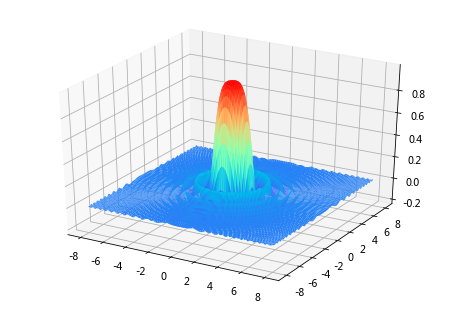

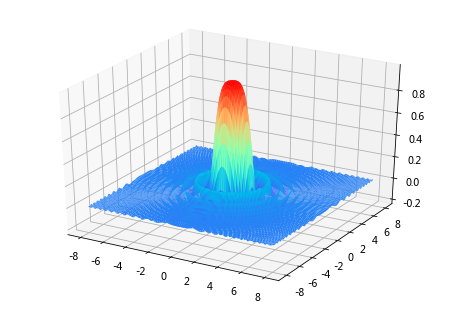

In [12]:
# 3D绘图
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.plot_surface(x.numpy(), y.numpy(), z.numpy(), rstride=1, cstride=1, cmap='rainbow')
plt.show()

In [ ]:
# 完整的训练 + 评测过程
import tensorflow as tf

(trainx, trainy), (testx, testy) = tf.keras.datasets.mnist.load_data()
epochs = 20
batchsize = 128
lr = 0.1

def preprocess(x, y):
    #类型转换
    x = tf.cast(x, tf.float32)
    # x归一化
    x = x / 255
    # reshape
    x = tf.reshape(x, [-1, 28*28])
    y = tf.one_hot(y, depth=10)
    return x, y
    
traindb = tf.data.Dataset.from_tensor_slices((trainx, trainy))
traindb = traindb.shuffle(10000)
traindb = traindb.batch(batchsize)
traindb = traindb.map(preprocess)

testdb = tf.data.Dataset.from_tensor_slices((testx, testy))
testdb = testdb.batch(batchsize)
testdb = testdb.map(preprocess)

# 参数初始化
w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
b1 = tf.Variable(tf.zeros([256]))
w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
b2 = tf.Variable(tf.zeros([128]))
w3 = tf.Variable(tf.random.truncated_normal([128, 10], stddev=0.1))
b3 = tf.Variable(tf.zeros([10]))

def mse_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

train_loss = []
test_loss = []
test_acc = []

for i in range(epochs):
    for step , (batchx, batchy) in enumerate(traindb):
        with tf.GradientTape() as tape:
            h1 = batchx@w1 + b1
            h1 = tf.nn.relu(h1)
            h2 = h1@w2 + b2
            h2 = tf.nn.relu(h2)
            out = h2@w3 + b3
            out = tf.nn.softmax(out)
            loss = mse_loss(batchy, out)
        
        grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3])
        
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])
        w3.assign_sub(lr * grads[4])
        b3.assign_sub(lr * grads[5])
    print('epochs {}, loss {}'.format(i, loss))
    train_loss.append(loss)
    
    total_correct = 0
    for batchx, batchy in testdb:
        h1 = tf.nn.relu(batchx@w1 + b1)
        h2 = tf.nn.relu(h1@w2 + b2)
        out = tf.nn.softmax(h2@w3 + b3)
        
        loss = mse_loss(batchy, out)
        true_label = tf.argmax(batchy, axis=1)
        pred_label = tf.argmax(out, axis=1)
        
        correct = tf.equal(true_label, pred_label)
        total_correct += tf.reduce_sum(tf.cast(correct, tf.int32)).numpy()
    
    test_loss.append(loss)
    acc = total_correct / len(testx)
    test_acc.append(acc)
    
    print('epochs {}, evaluation loss {}, accuracy {}'.format(i, loss, acc))

epochs 1, evaluation loss 0.026478463783860207, accuracy 0.8348
epochs 2, loss 0.02124243974685669
epochs 2, evaluation loss 0.02036319114267826, accuracy 0.87
epochs 3, loss 0.02028556726872921
epochs 3, evaluation loss 0.017631376162171364, accuracy 0.8881
